## Packages importing 

In [8]:
!pip install matplotlib seaborn pandas numpy scikit-learn datasist imbalanced-learn category-encoders xgboost joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:009 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 3.4 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:01


In [9]:
# Packages for EDA 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from datasist.structdata import detect_outliers
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import category_encoders as ce
import re 

# Modeling and evaluation 
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report 
import joblib

# Packages options 
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all 
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;

import warnings 
warnings.filterwarnings("ignore")

/home/wasif/anaconda3/envs/tester/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## Reading Data 

In [10]:
df = pd.read_csv("train.csv",low_memory=False)

In [8]:
df.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
10980,0x5656,CUS_0x281d,May,Cheeb,37,510-09-3043,_______,118062.2,10136.516667,0,...,Good,1393.23,29.143092,NaN,No,0.000000,258.60022098525985,High_spent_Medium_value_payments,1005.0514456814067,Standard
26070,0xaec0,CUS_0x23c1,July,Julien Toyerj,27,338-33-2496,Media_Manager,113207.36,9137.946667,1,...,Good,1289.91,37.823005,29 Years and 11 Months,No,221.745627,571.7386326383328,High_spent_Small_value_payments,380.31040683040044,Good
42853,0x11117,CUS_0x2acc,June,Sineadg,52,091-30-2808,Manager,108171.63,9095.302500,3,...,Good,461.19,34.414373,29 Years and 8 Months,No,145.870633,103.18443449979671,High_spent_Large_value_payments,900.4751820698109,Standard
57724,0x1683a,CUS_0x443e,May,Nadia Damounir,37,010-00-5884,Scientist,60537.18,NaN,7,...,Standard,393.5,36.592541,31 Years and 0 Months,Yes,99.211255,119.43208084639971,High_spent_Medium_value_payments,549.6331640972081,Standard
17535,0x7cbd,CUS_0x3bf3,August,Forgionen,30,416-44-4780,Engineer,83576.26,6912.688333,3,...,Good,1192.96,31.977476,23 Years and 3 Months,No,112.387082,284.7530038666182,Low_spent_Medium_value_payments,574.128747474336,Standard
12224,0x5da2,CUS_0x3394,January,Nick Brownv,41,787-74-8249,Journalist,39540.78,NaN,7,...,Bad,3506.0,28.941259,10 Years and 3 Months,Yes,227.530865,161.32537864027682,Low_spent_Medium_value_payments,232.15025647778032,Standard
1913,0x2137,CUS_0x6f38,February,Ransdellj,30,593-29-9633,Entrepreneur,60552.76,NaN,1332,...,_,463.07,25.221363,18 Years and 10 Months,No,111.728820,322.95202504413237,High_spent_Small_value_payments,320.32548821987046,Poor
17208,0x7ad6,CUS_0x97d5,January,Deutschl,21,401-45-8386,Engineer,18736.83,1682.402500,10,...,Bad,4384.76,28.403108,0 Years and 3 Months,Yes,92.650038,140.7507672773022,Low_spent_Small_value_payments,224.83944464094228,Standard
83249,0x1fdcb,CUS_0x2f7e,February,Sabina Zawadzkif,31,109-48-2095,Doctor,126353.04,10635.420000,4,...,_,859.77,29.813305,31 Years and 3 Months,NM,167.043910,147.7759837301983,High_spent_Large_value_payments,988.7221060294014,Standard
13380,0x6466,CUS_0x8a2b,May,Donny Kwokw,35,096-57-2895,Accountant,28163.57,2466.964167,6,...,_,58.26,35.155391,NaN,Yes,73.020322,149.7056284108695,High_spent_Small_value_payments,283.97046654178587,Standard


## Data Exploration

In [9]:
df.shape

(100000, 28)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [11]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [12]:
df.duplicated().sum()

0

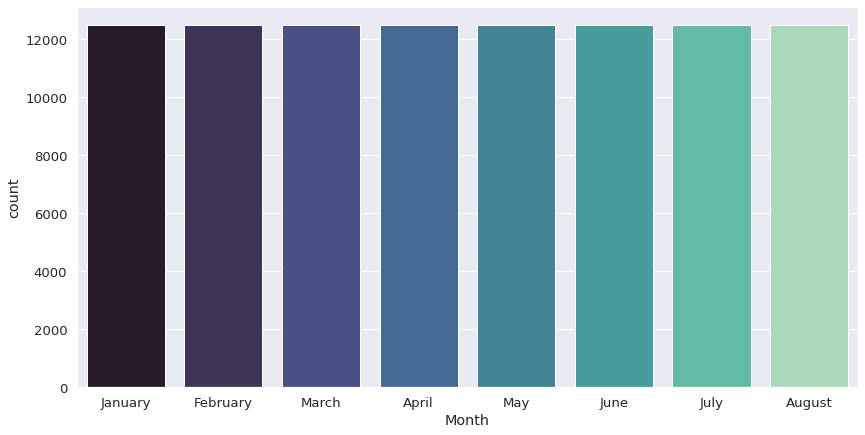

In [13]:
sns.countplot(df['Month'],palette="mako");

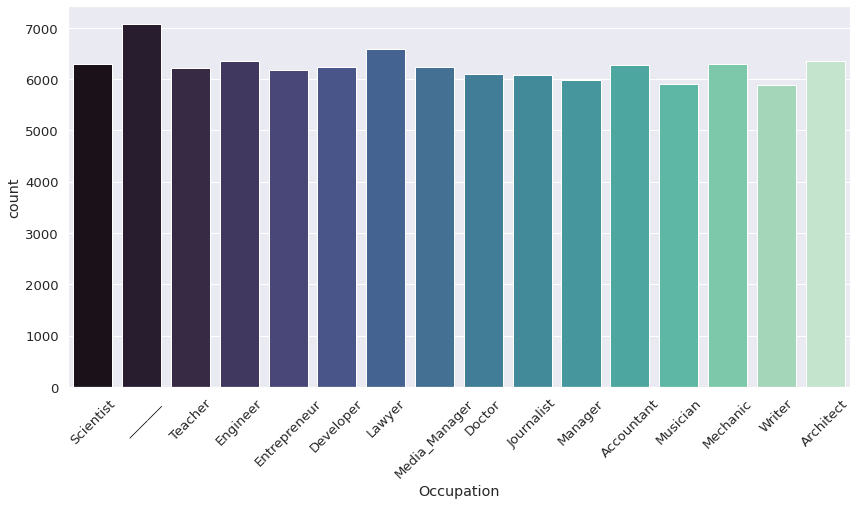

In [14]:
sns.countplot(df['Occupation'],palette="mako");
plt.xticks(rotation=45);

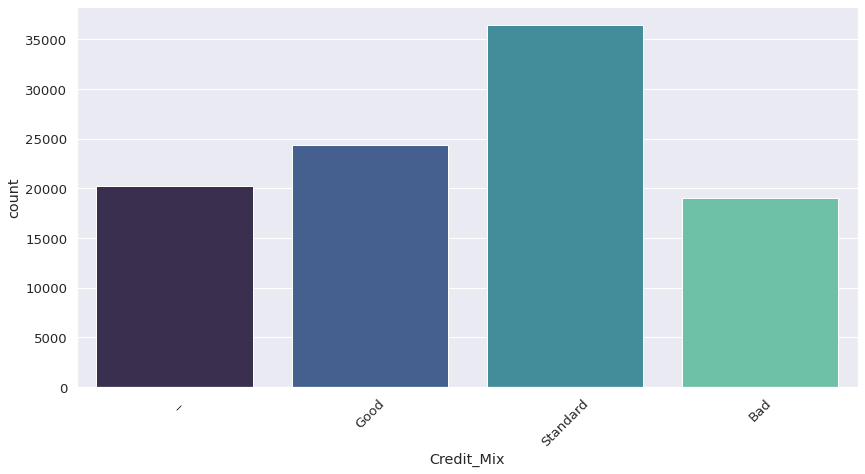

In [15]:
sns.countplot(df['Credit_Mix'],palette="mako");
plt.xticks(rotation=45);

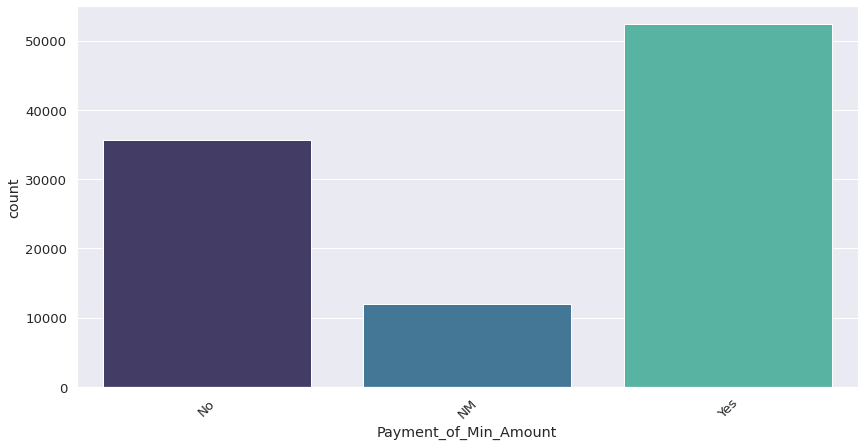

In [16]:
sns.countplot(df['Payment_of_Min_Amount'],palette="mako");
plt.xticks(rotation=45);

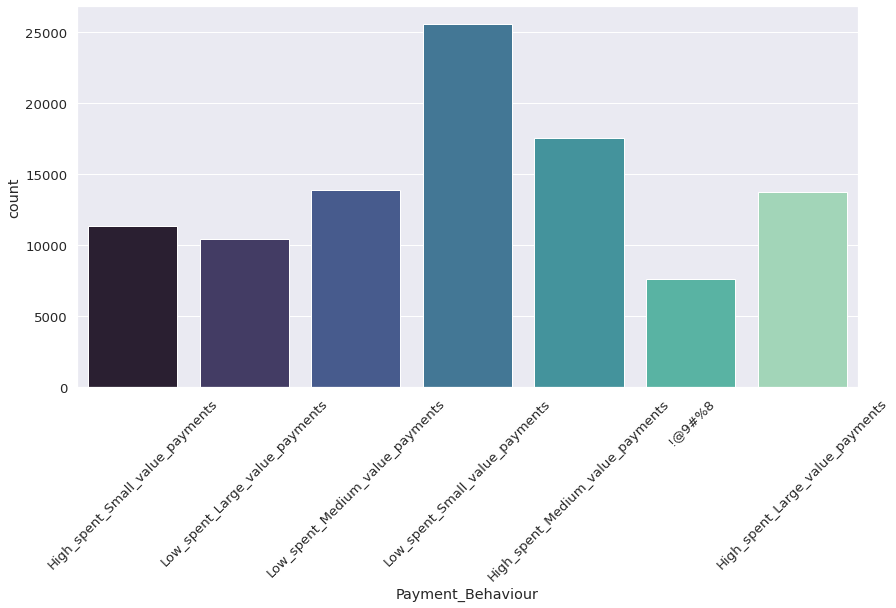

In [17]:
sns.countplot(df['Payment_Behaviour'],palette="mako");
plt.xticks(rotation=45);

# Plotting The Target 

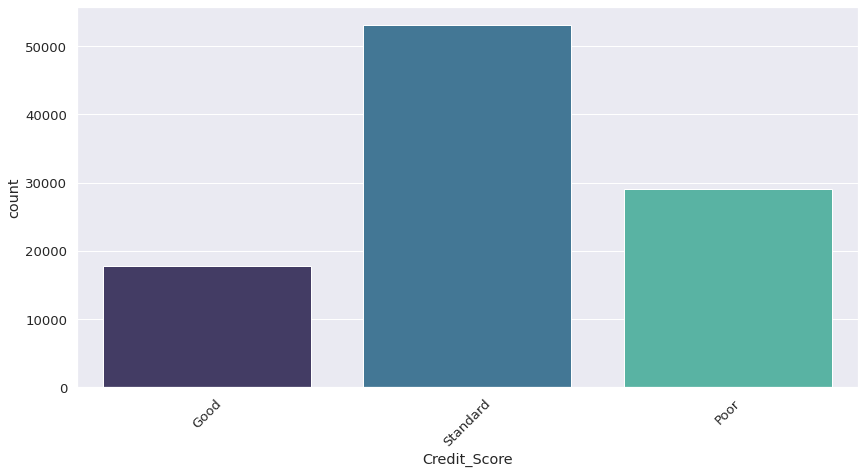

In [18]:
sns.countplot(df['Credit_Score'],palette="mako");
plt.xticks(rotation=45);

In [19]:
df['Credit_Score'].value_counts(normalize=True)

Standard    0.53174
Poor        0.28998
Good        0.17828
Name: Credit_Score, dtype: float64

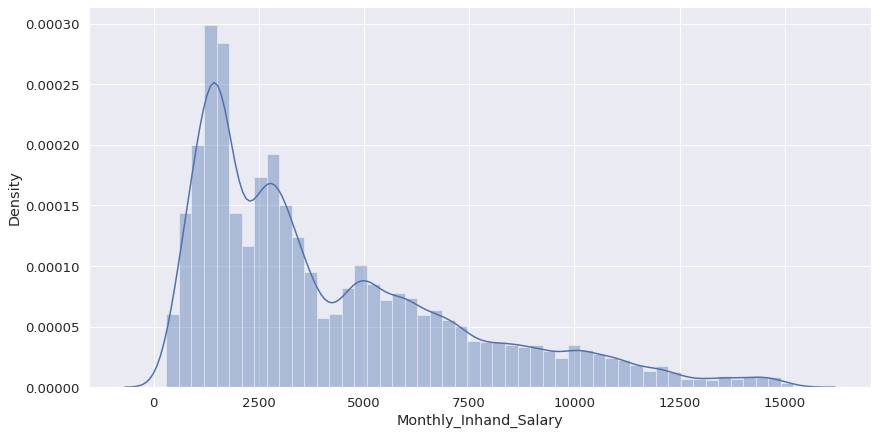

In [20]:
sns.distplot(df['Monthly_Inhand_Salary']);

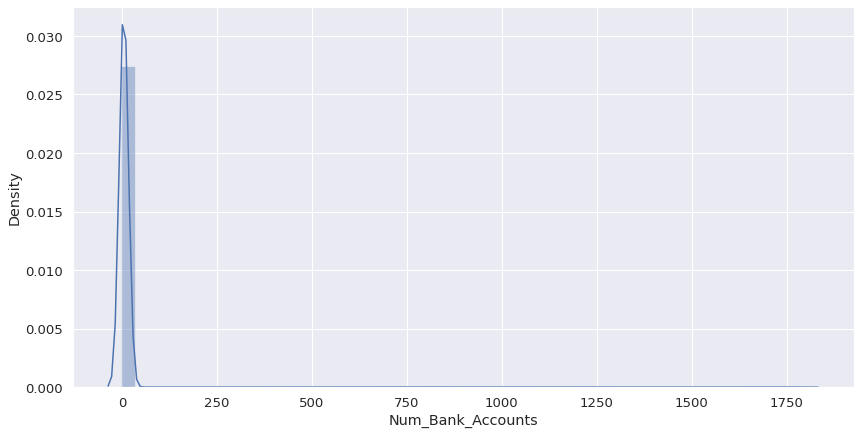

In [21]:
sns.distplot(df['Num_Bank_Accounts']);

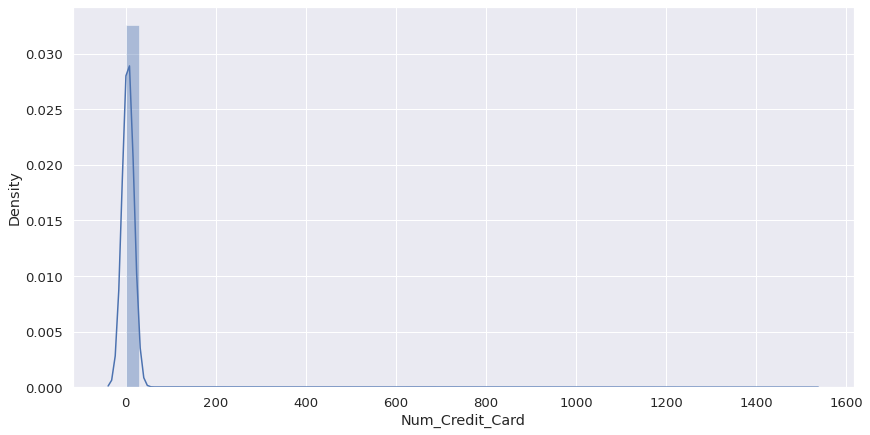

In [22]:
sns.distplot(df['Num_Credit_Card']);

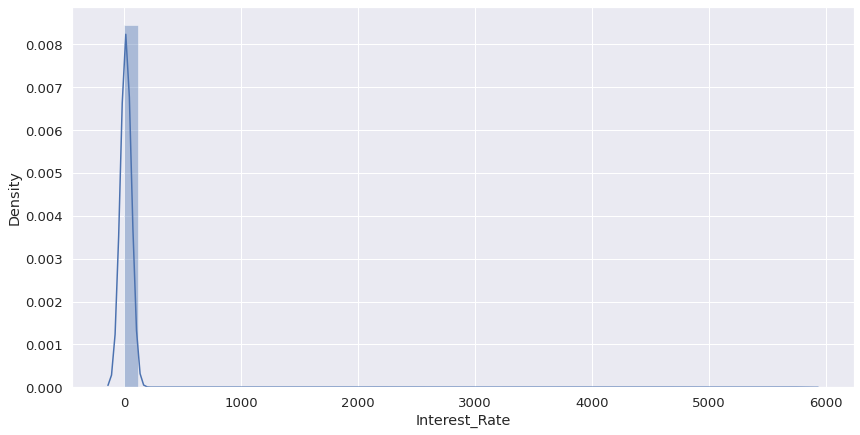

In [23]:
sns.distplot(df['Interest_Rate']);

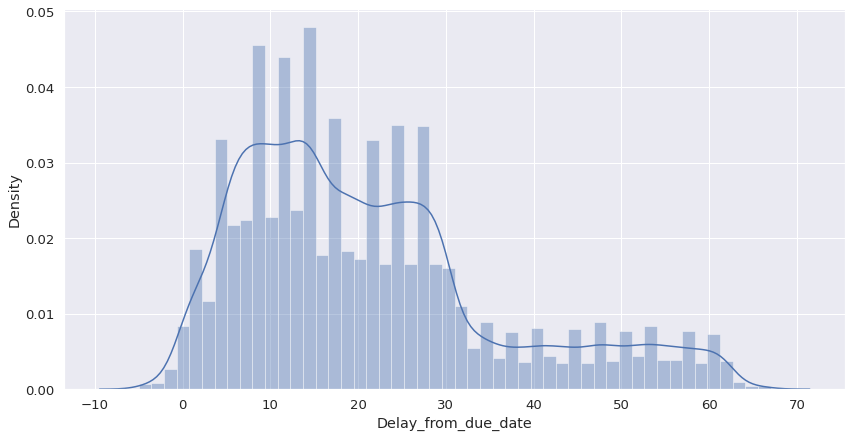

In [24]:
sns.distplot(df['Delay_from_due_date']);

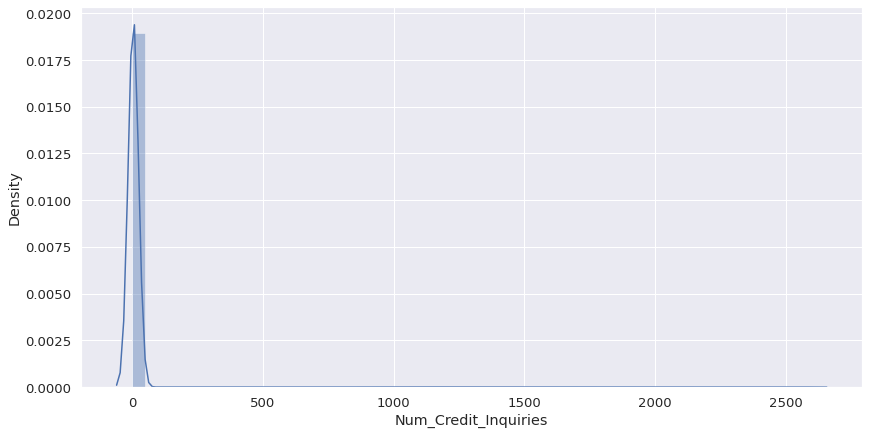

In [25]:
sns.distplot(df['Num_Credit_Inquiries']);

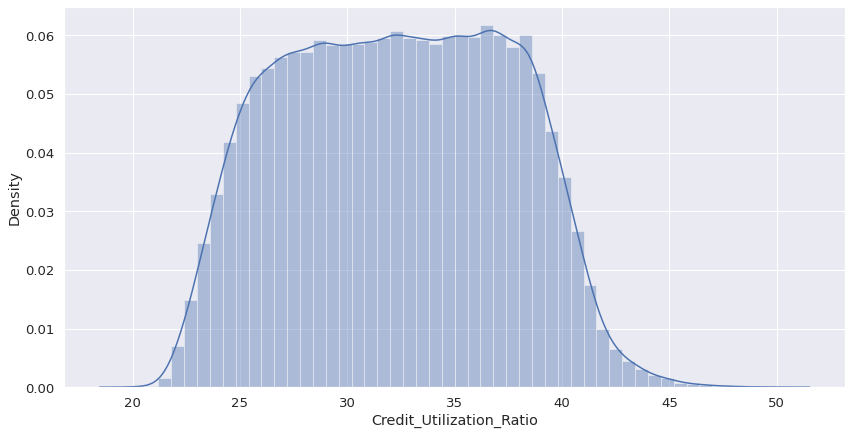

In [26]:
sns.distplot(df['Credit_Utilization_Ratio']);

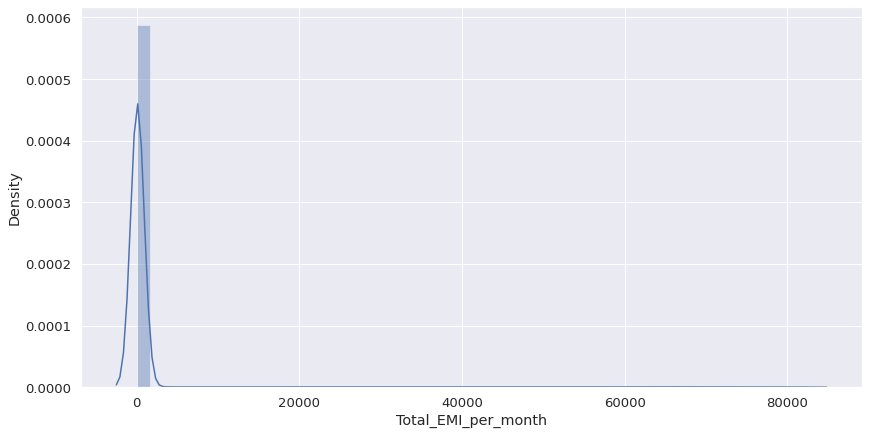

In [27]:
sns.distplot(df['Total_EMI_per_month']);

In [28]:
df['Type_of_Loan'].value_counts().head(10)

Not Specified                      1408
Credit-Builder Loan                1280
Personal Loan                      1272
Debt Consolidation Loan            1264
Student Loan                       1240
Payday Loan                        1200
Mortgage Loan                      1176
Auto Loan                          1152
Home Equity Loan                   1136
Personal Loan, and Student Loan     320
Name: Type_of_Loan, dtype: int64

### Identify issues 
1. ~~ID, Name and SSN (Not useful)~~
2. Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt Credit_Mix, Monthly_Balance __Numerical but show as catogery (need to be fixed)__
3. Occupation, Credit_Mix has value "_____"
4. Data contains outliers 
5. Num_Credit_Card has __zeros__
6. Type_of_Loan Need to rewrite as 8 columns 
7. Num_Bank_Accounts contains negative values
8. Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,'Credit_Mix' (needs Feature Engineering)
9. Target Columns is Imbalanced
10. A lot of missing data 

## Data cleaning

#### removing unuseful Columns (Uniques)

In [29]:
del df['ID'] # Identification 
del df['Name'] # Name of client 
del df['SSN'] # SSN (social security number of a person)

#### Fix Numerical Columns 

1. replace _  
2. convert into float 

In [30]:
N_to_fix = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']

In [31]:
def fix_nums(num):
    try : 
        return float(num.replace("_",""))
    except :
        return np.nan

In [32]:
for col in N_to_fix :
    df[col] = df[col].apply(fix_nums)

### Type_of_Loan

In [33]:
## Rebuild Type of loans Columns 
for i in df['Type_of_Loan'].value_counts().head(9).index[1:] : 
    df[i] = df['Type_of_Loan'].str.contains(i)

del df['Type_of_Loan']

#### Num_Bank_Accounts

In [34]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x :abs (x))

#### Num_Credit_Card

In [35]:
df['Num_Credit_Card'].replace(0,1,inplace=True)

#### Credit_History_Age

In [36]:
def History_age(age):
    try : 
        years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return years*12 + month
    except :
        return np.nan

In [37]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(History_age)

#### Payment_of_Min_Amount

In [38]:
df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [39]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64

#### Payment_Behaviour

In [40]:
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [41]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: Payment_Behaviour, dtype: int64

### Occupation

In [42]:
df['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [43]:
occs = df['Occupation'].value_counts().index[1:]
occs

Index(['Lawyer', 'Architect', 'Engineer', 'Scientist', 'Mechanic',
       'Accountant', 'Developer', 'Media_Manager', 'Teacher', 'Entrepreneur',
       'Doctor', 'Journalist', 'Manager', 'Musician', 'Writer'],
      dtype='object')

In [44]:
id_ = "CUS_0xb891"
oc = df[df['Customer_ID'] == id_]['Occupation'].mode()[0]
df[df['Customer_ID'] == id_].replace("_______",oc)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
24,CUS_0xb891,January,54.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,433.604773,Standard,False,False,False,False,False,False,False,False
25,CUS_0xb891,February,54.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,409.951812,Standard,False,False,False,False,False,False,False,False
26,CUS_0xb891,March,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,411.427123,Standard,False,False,False,False,False,False,False,False
27,CUS_0xb891,April,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,262.499594,Standard,False,False,False,False,False,False,False,False
28,CUS_0xb891,May,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,359.374916,Standard,False,False,False,False,False,False,False,False
29,CUS_0xb891,June,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,419.880784,Standard,False,False,False,False,False,False,False,False
30,CUS_0xb891,July,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,443.549957,Standard,False,False,False,False,False,False,False,False
31,CUS_0xb891,August,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,...,379.216381,Standard,False,False,False,False,False,False,False,False


In [45]:
for ID in df[df['Occupation'] == "_______"]['Customer_ID'] : 
    oc = df[df['Customer_ID'] == ID]['Occupation'].mode()[0]
    df[df['Customer_ID'] == ID] = df[df['Customer_ID'] == ID].replace("_______",oc)

In [46]:
df['Occupation'].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6715
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
_______             5
Name: Occupation, dtype: int64

In [47]:
df['Occupation'] = df['Occupation'].replace("_______",df['Occupation'].mode()[0])

In [48]:
df['Occupation'].value_counts()

Lawyer           7101
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6715
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

#### Credit_Mix

In [49]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [50]:
m = {
    "Bad":0,
    "Standard":1,
    "Good":2,
    "_":np.nan
}

In [51]:
df['Credit_Mix'] = df['Credit_Mix'].map(m)

### Advanced Handling Missing Data 

In [52]:
# Edit Columns from bool to int 
for col in list(df.columns[-8:]):
    df[col] = df[col].astype(float)

In [53]:
IDs = 1 
for ID in df['Customer_ID'].unique() :
    df['Customer_ID'] = df['Customer_ID'].replace(ID,IDs)
    IDs += 1 

In [54]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)

In [55]:
Numericals = df.select_dtypes(exclude='object').columns[1:]
Numericals

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit-Builder Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

In [56]:
for col in Numericals[1:]:
    imputer.fit(df[['Customer_ID',col]])
    df[['Customer_ID',col]] = imputer.transform(df[['Customer_ID',col]])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  float64
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [58]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(df[['Payment_Behaviour']])
df[['Payment_Behaviour']] = imputer.transform(df[['Payment_Behaviour']])

### Handling Outliers 

In [59]:
## replace Outliers with median 
for col in Numericals :
    outliers_indecies = detect_outliers(df,0,[col])
    median = df[col].median()
    df[col].iloc[outliers_indecies] = median

# Data Preprocessing

### Handling Catogerical 

In [60]:
df.select_dtypes(include="object")

,Month,Occupation,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,No,High_spent_Small_value_payments,Good
1,February,Scientist,No,Low_spent_Large_value_payments,Good
2,March,Scientist,No,Low_spent_Medium_value_payments,Good
3,April,Scientist,No,Low_spent_Small_value_payments,Good
4,May,Scientist,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...
99995,April,Mechanic,No,High_spent_Large_value_payments,Poor
99996,May,Mechanic,No,High_spent_Medium_value_payments,Poor
99997,June,Mechanic,No,High_spent_Large_value_payments,Poor
99998,July,Mechanic,No,Low_spent_Large_value_payments,Standard


In [61]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [62]:
m = {
    "Poor":0,
    "Standard":1,
    "Good":2
}

In [63]:
df['Credit_Score'] = df['Credit_Score'].map(m)

In [64]:
del df['Customer_ID']

In [65]:
df = pd.get_dummies(df,drop_first=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 100000 non-null  float64
 1   Annual_Income                                       100000 non-null  float64
 2   Monthly_Inhand_Salary                               100000 non-null  float64
 3   Num_Bank_Accounts                                   100000 non-null  float64
 4   Num_Credit_Card                                     100000 non-null  float64
 5   Interest_Rate                                       100000 non-null  float64
 6   Num_of_Loan                                         100000 non-null  float64
 7   Delay_from_due_date                                 100000 non-null  float64
 8   Num_of_Delayed_Payment                              100000 non-nu

In [67]:
# df.to_csv("Preprocessed_Data.csv")

In [10]:
df = pd.read_csv("../input/credit-score-data-preprocessed/Preprocessed_Data.csv",low_memory=False)

### Data Spliting 
- Try Resampling 

In [11]:
# define dataset
X, y = df.drop("Credit_Score",axis=1).values , df["Credit_Score"] 

## Apply oversampling
- Data is Not 100% balanced, Let's try improving it. 

In [12]:
y.value_counts(normalize=True)

1    0.53174
0    0.28998
2    0.17828
Name: Credit_Score, dtype: float64

In [16]:
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
X_data_rus, y_data_rus = rus.fit_resample(X, y)

In [17]:
y_data_rus.value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: Credit_Score, dtype: float64

In [18]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size=0.3, random_state=42,stratify=y_data_rus)

### Handling Numerical 
- Using Power transformer to avoid Data Skewness

In [19]:
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)

In [20]:
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

# Modeling and Evaluation


#### Model Building

In [25]:
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = XGBClassifier(n_jobs=-1)

model = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1)

#### Model fitting

In [26]:
model.fit(X_train, y_train)

[06:19:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[06:25:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:25:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:25:17] WARNING: ../src/learner.cc:1095: 

StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('extraTress',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('randomforest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('histGradientBoosting',
                                HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytr...
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                              

#### model evaluation

In [27]:
print("Train Score: ",model.score(X_train, y_train))

Train Score:  0.9988447588769982


In [28]:
print("Test Score: ",model.score(X_test, y_test))

Test Score:  0.8504085086821155


In [29]:
y_pred = model.predict(X_test)

In [30]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     15488
           1       0.81      0.79      0.80     16284
           2       0.90      0.89      0.89     16085

    accuracy                           0.85     47857
   macro avg       0.85      0.85      0.85     47857
weighted avg       0.85      0.85      0.85     47857



#### model Saving

In [34]:
# joblib.dump(model,'model.h5')
# joblib.dump(scalar,'scalar.h5')